# 2.4a Optimizing Random Forest on Weather Dataset

## Contents
### 1. Import libraries and data sets
### 2. Reduce data set to one decade
### 3. Split data
### 4. Grid Search on Hyperparameters
### 5. Random Search on Hyperparameters
### 6. Random Forest on all stations, 1960s
### 5. Random Forest Basel
### 6. Random Forest Dusseldorf
### 7. Random Forest Maastricht

## 1. Import libraries and data sets

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from numpy import reshape, argmax
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
# additional libraries
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [90]:
path = r'/Users/susanwang/Documents/CF_ML/ML_Project'

In [91]:
weather_df = pd.read_csv(os.path.join(path, 'Data Sets', 'cleaned_weather.csv'), index_col=False)

In [92]:
weather_df.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  ...  VALENTIA_pressure  \
0            10.9                     1  ...             1.0003   
1            10.1                     6  ...             1.0007   
2             9.9                     6  ...             1.0096   
3            10.6                     8  ...             1.0184   
4             6.0                     8  ...             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  \
0                 8.5                6.0               10.9   
1                 8.9                5.6               12.1   
2                10.5                8.1               12.9   
3                 7.4                7.3               10.6   
4                 5.7                3.0                8.4   

   KASSEL_cloud_cover  MUNCHENB_pressure  STOCKHOLM_humidity  
0                   8             1.0304                0.98  
1                   6             1.0292                0.62  
2                   8             1.0320                0.69  
3                   6             1.0443                0.98  
4                   7             1.0430                0.96  

[5 rows x 135 columns]

In [93]:
weather_df.shape

(22950, 135)

In [94]:
answers_df = pd.read_csv(os.path.join(path, 'Data Sets', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col=False)

In [95]:
answers_df.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [96]:
# remove date column
answers_df.drop(columns=['DATE'], inplace=True)

In [97]:
answers_df.head()

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0                       0                          0   
1                       0                          0   
2                       0                          0   
3                       0                          0   
4                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [98]:
answers_df.shape

(22950, 15)

## 2. Reduce data set to one decade

NOTE: the cleaned data set does not contain the 'DATE' column anymore, so we cannot filter by years. Instead, I will have to just take the first ten years, meaning the first 3653 rows (the 1960s had three leap years)

In [99]:
weather1960s = weather_df[:3653]
weather1960s.shape

(3653, 135)

In [100]:
weather1960s.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  BELGRADE_cloud_cover  ...  VALENTIA_pressure  \
0            10.9                     1  ...             1.0003   
1            10.1                     6  ...             1.0007   
2             9.9                     6  ...             1.0096   
3            10.6                     8  ...             1.0184   
4             6.0                     8  ...             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  \
0                 8.5                6.0               10.9   
1                 8.9                5.6               12.1   
2                10.5                8.1               12.9   
3                 7.4                7.3               10.6   
4                 5.7                3.0                8.4   

   KASSEL_cloud_cover  MUNCHENB_pressure  STOCKHOLM_humidity  
0                   8             1.0304                0.98  
1                   6             1.0292                0.62  
2                   8             1.0320                0.69  
3                   6             1.0443                0.98  
4                   7             1.0430                0.96  

[5 rows x 135 columns]

In [101]:
answers1960s = answers_df[:3653]
answers1960s.shape

(3653, 15)

In [102]:
answers1960s.head()

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0                       0                          0   
1                       0                          0   
2                       0                          0   
3                       0                          0   
4                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

## 3. Split data

In [103]:
X = weather1960s.copy()
y = answers1960s.copy()

In [104]:
print(X.shape)
print(y.shape)

(3653, 135)
(3653, 15)


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [106]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2739, 135)
(914, 135)
(2739, 15)
(914, 15)


## 4. Grid Search on Hyperparameters

In [107]:
# creating a RF classifier
clf = RandomForestClassifier()

In [108]:
# Grid search cv
grid_space = {'max_depth': [20, 50, 100, None],
              'n_estimators': [200, 300, 400],
              'max_features': [5, 7, 9]
              #'min_samples_leaf':[1,2,3],
              #'min_samples_split':[1,2,3]
           }

In [109]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Search took 3.069535215695699 minutes


In [110]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 20, 'max_features': 9, 'n_estimators': 300}
Best GRID search score is: 0.5542168674698796


## 5. Random Search on Hyperparamters

In [111]:
# Random search cv
rs_space = {'max_depth': list(np.arange(10, 200, step=20)) + [None],
              'n_estimators': np.arange(100, 500, step=50),
              'max_features': randint(1,7),
              'criterion': ['gini','entropy'],
              'min_samples_leaf': randint(1,4),
              'min_samples_split': np.arange(2, 10, step=2)
         }

In [112]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [113]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 19.103746596972147 minutes


In [114]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 110, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}
Best RANDOM search score is: 0.5293902884264331


In [115]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 20, 'max_features': 9, 'n_estimators': 300}
Best GRID search score is: 0.5542168674698796
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 110, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}
Best RANDOM search score is: 0.5293902884264331


## 6. Random Forest all stations, 1960s

In [116]:
# creating a RF classifier
clf3 = RandomForestClassifier(n_estimators = 300, max_depth=20, max_features = 9)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=9, n_estimators=300)

In [117]:
# performing predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5886214442013129


### Plot trees

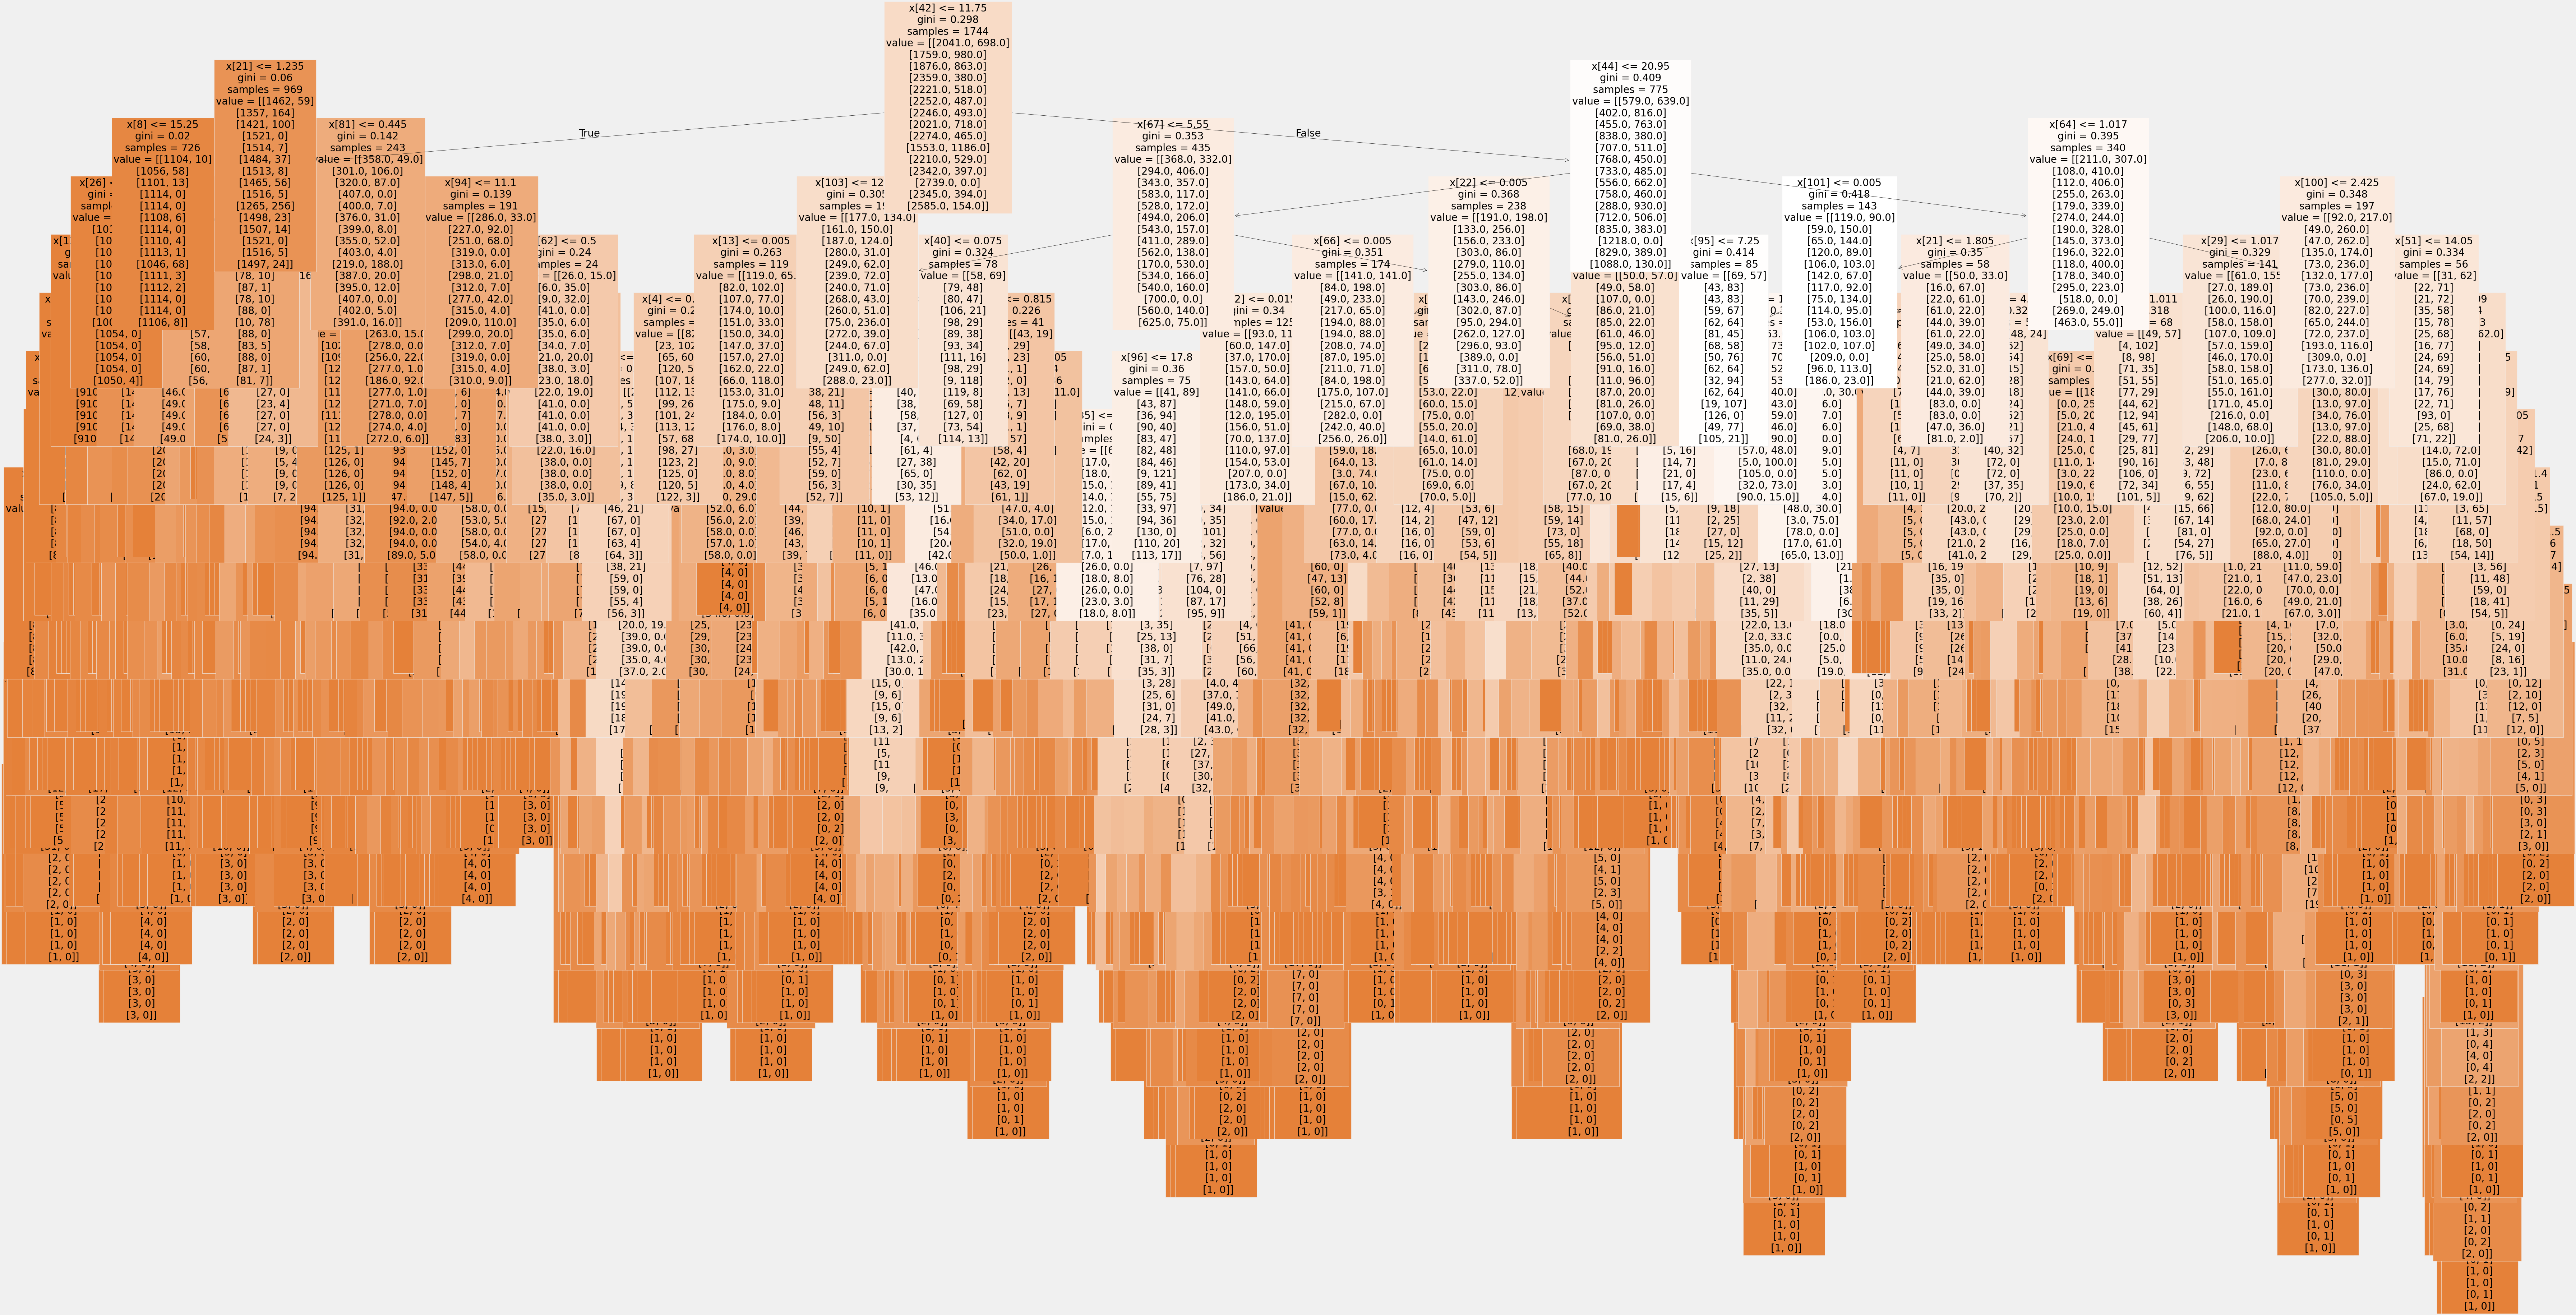

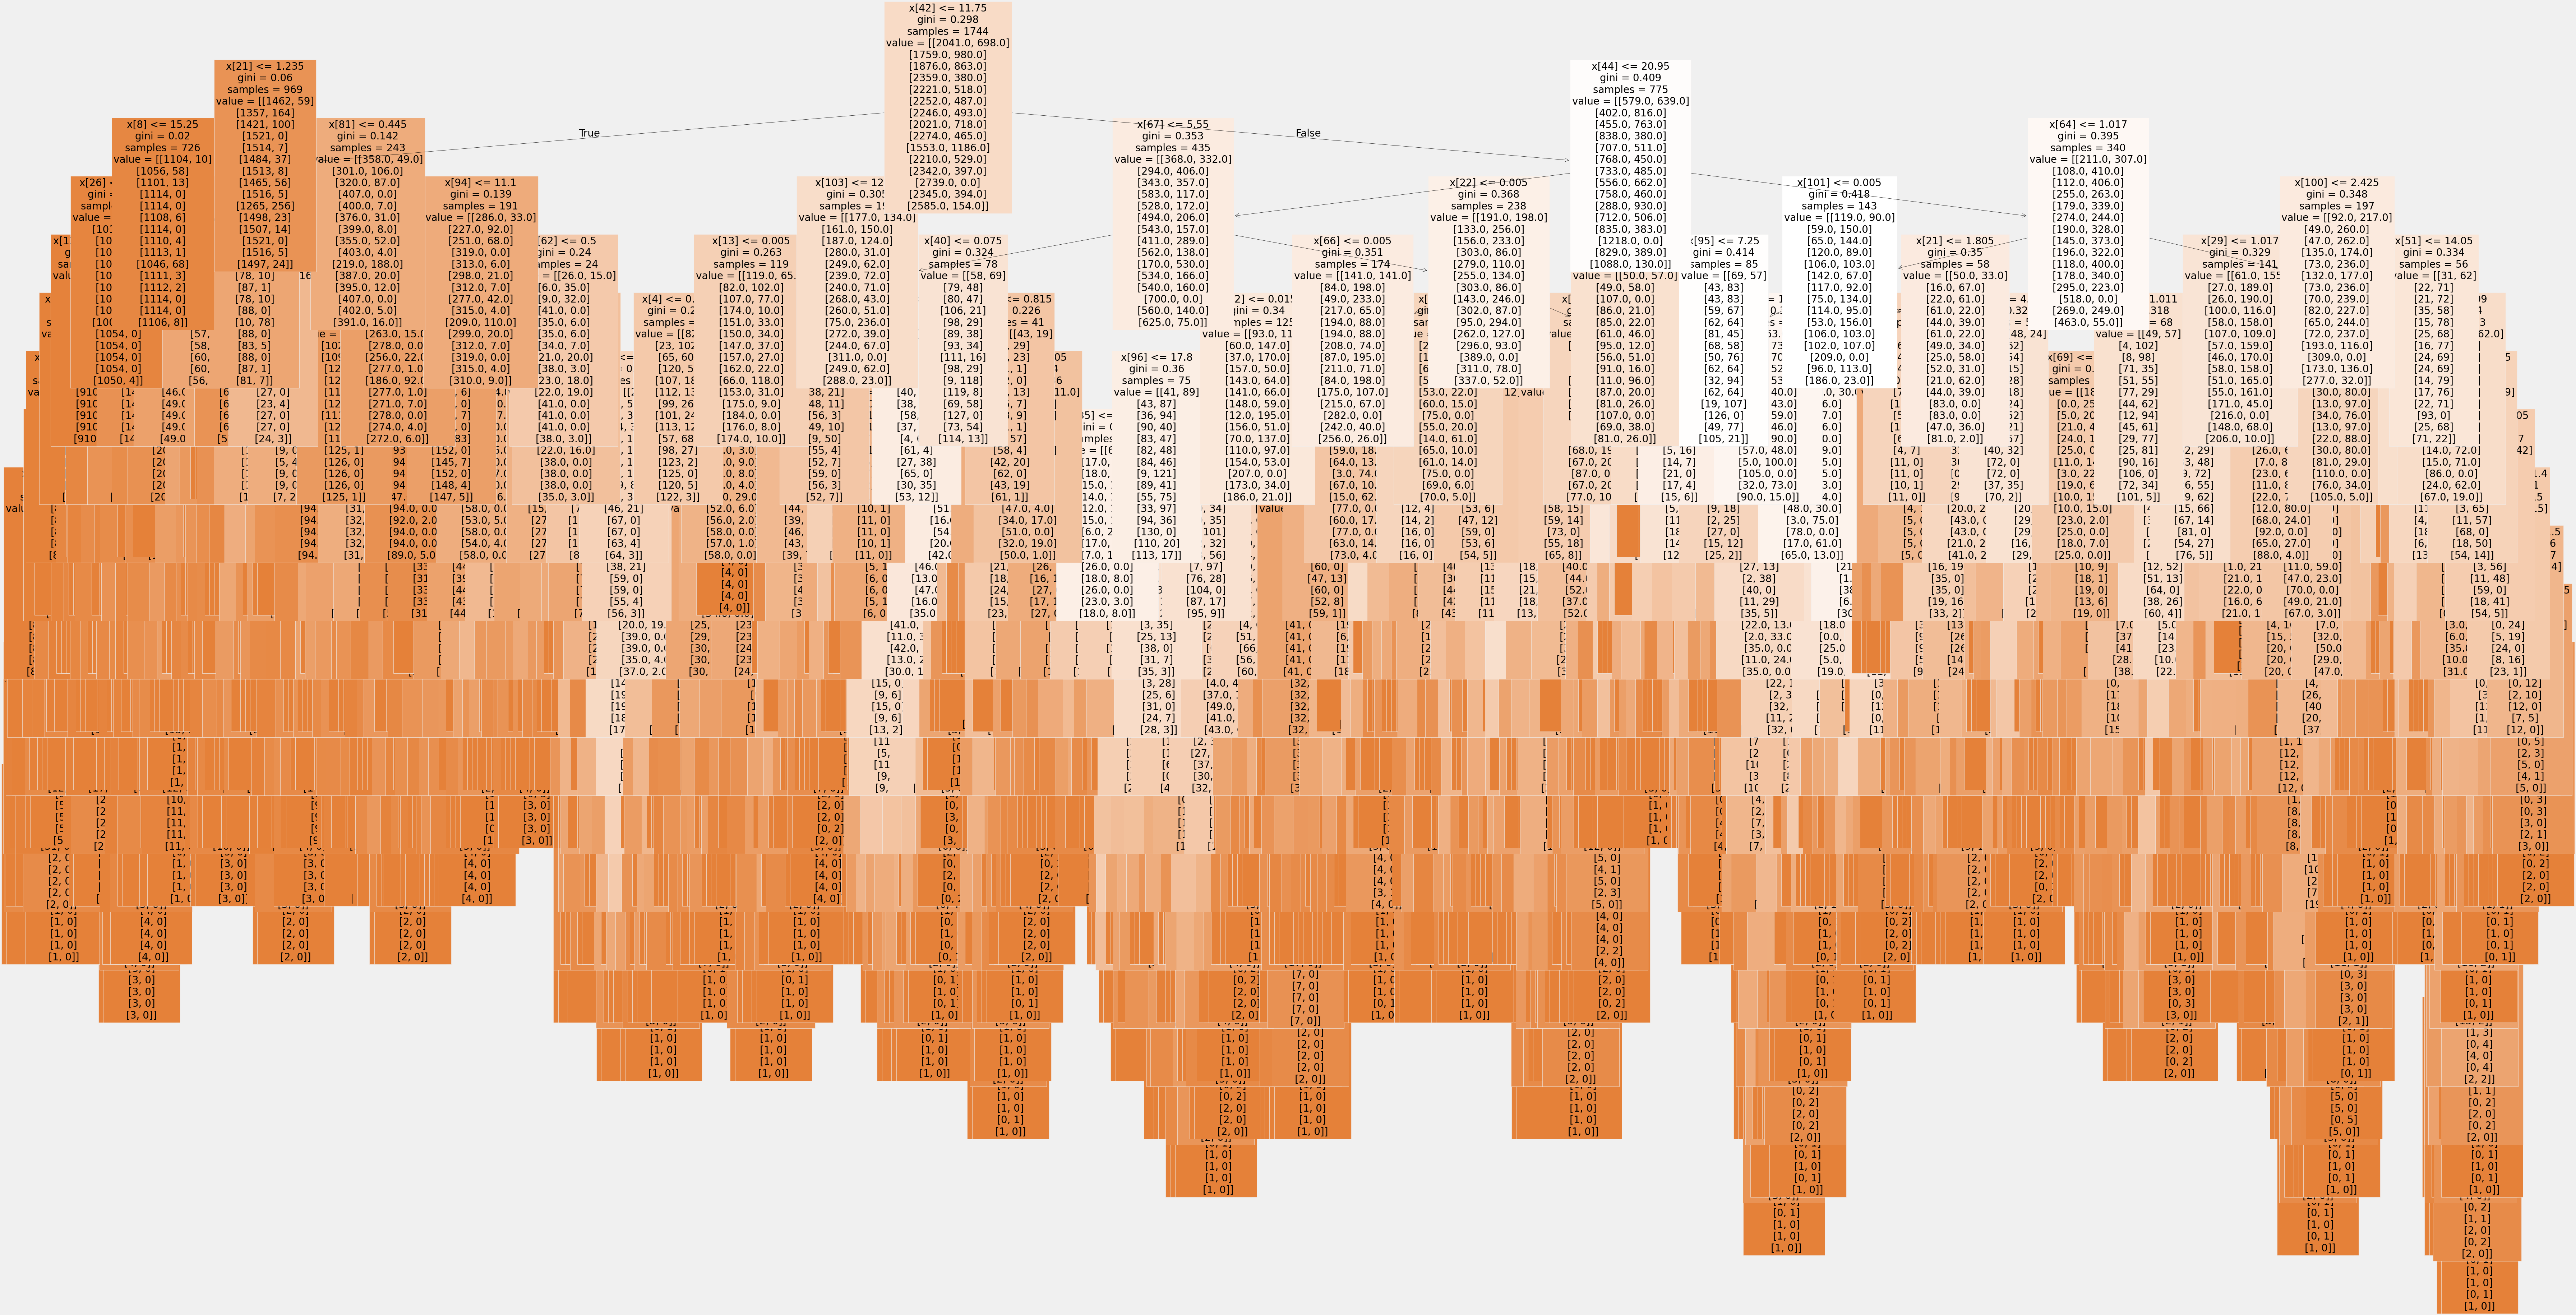

In [119]:
### tree 1
fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[1], fontsize = 20, class_names=['Unpleasant', 'Pleasant'], filled=True)
plt.show()

### List of feature importances

In [120]:
np.set_printoptions(threshold=np.inf)
newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(135,)


array([0.00432045, 0.00318589, 0.        , 0.00494665, 0.01392723,
       0.00644891, 0.02163166, 0.00585789, 0.02351746, 0.00344873,
       0.0040411 , 0.00447248, 0.0044459 , 0.0119529 , 0.00454514,
       0.00762987, 0.00450854, 0.00816804, 0.        , 0.        ,
       0.        , 0.00470389, 0.01198867, 0.00648326, 0.01048281,
       0.00649575, 0.02056037, 0.00317471, 0.0031492 , 0.00553521,
       0.00418917, 0.01117304, 0.00401545, 0.01363957, 0.00344598,
       0.02180078, 0.00557047, 0.00447607, 0.00040137, 0.00426521,
       0.0160712 , 0.0064532 , 0.01969741, 0.00373743, 0.02660781,
       0.00224502, 0.00342934, 0.0046638 , 0.00439023, 0.00670586,
       0.00380424, 0.01183583, 0.00300646, 0.01839233, 0.00310276,
       0.00606455, 0.00493513, 0.01611678, 0.00461652, 0.01235501,
       0.0032418 , 0.02206925, 0.00335013, 0.00340707, 0.00408183,
       0.00588231, 0.01580392, 0.00454022, 0.01864752, 0.00395506,
       0.01802383, 0.00406612, 0.00405364, 0.00425713, 0.00505

In [121]:
np.set_printoptions(threshold=1000)

In [122]:
newarray = newarray.reshape(-1,15,9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.00432045, 0.00318589, 0.        , 0.00494665, 0.01392723,
         0.00644891, 0.02163166, 0.00585789, 0.02351746],
        [0.00344873, 0.0040411 , 0.00447248, 0.0044459 , 0.0119529 ,
         0.00454514, 0.00762987, 0.00450854, 0.00816804],
        [0.        , 0.        , 0.        , 0.00470389, 0.01198867,
         0.00648326, 0.01048281, 0.00649575, 0.02056037],
        [0.00317471, 0.0031492 , 0.00553521, 0.00418917, 0.01117304,
         0.00401545, 0.01363957, 0.00344598, 0.02180078],
        [0.00557047, 0.00447607, 0.00040137, 0.00426521, 0.0160712 ,
         0.0064532 , 0.01969741, 0.00373743, 0.02660781],
        [0.00224502, 0.00342934, 0.0046638 , 0.00439023, 0.00670586,
         0.00380424, 0.01183583, 0.00300646, 0.01839233],
        [0.00310276, 0.00606455, 0.00493513, 0.01611678, 0.00461652,
         0.01235501, 0.0032418 , 0.02206925, 0.00335013],
        [0.00340707, 0.00408183, 0.00588231, 0.01580392, 0.00454022,
         0.01864752, 0.00395506, 0.0180238

In [123]:
sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.08383614, 0.0532127 , 0.06071474, 0.0701231 , 0.08728018,
       0.05847312, 0.07585192, 0.0784079 , 0.10117722, 0.07353329,
       0.07465352, 0.06272536, 0.03820047, 0.04910205, 0.03270831])

In [124]:
# list of stations
stations = list()
for c in weather_df.columns:
    if c.split('_', 1)[0] not in stations:
        stations.append(c.split('_', 1)[0])

stations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [125]:
important = pd.Series(sumarray, index = stations) #.sort_values(ascending = False)
important

BASEL         0.083836
BELGRADE      0.053213
BUDAPEST      0.060715
DEBILT        0.070123
DUSSELDORF    0.087280
HEATHROW      0.058473
KASSEL        0.075852
LJUBLJANA     0.078408
MAASTRICHT    0.101177
MADRID        0.073533
MUNCHENB      0.074654
OSLO          0.062725
SONNBLICK     0.038200
STOCKHOLM     0.049102
VALENTIA      0.032708
dtype: float64

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


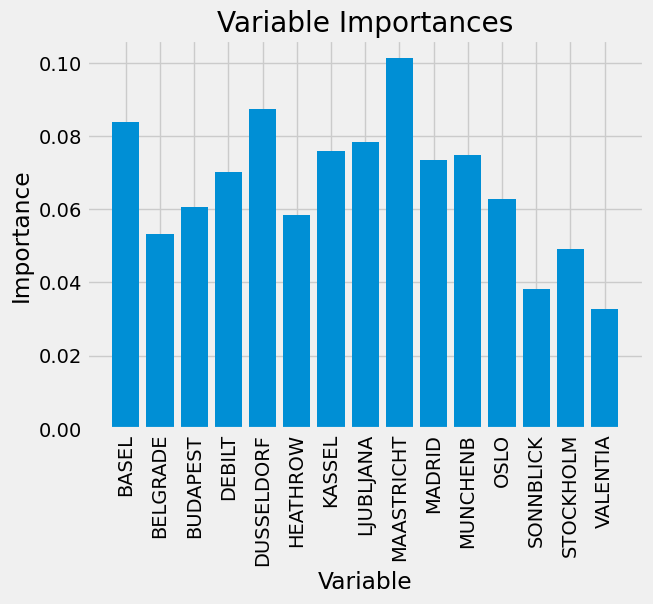

In [126]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(stations)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, stations, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')
plt.show()

## 7. Random Forest - Basel

### Create Basel subset

In [64]:
# Basel columns
basel_col = [c for c in weather_df.columns if c.split('_')[0] == 'BASEL']
basel_col

['BASEL_cloud_cover',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max']

In [65]:
basel_df = weather_df[basel_col]
basel_df.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  BASEL_global_radiation  \
0                  7            0.85           1.018                    0.32   
1                  6            0.84           1.018                    0.36   
2                  8            0.90           1.018                    0.18   
3                  3            0.92           1.018                    0.58   
4                  6            0.95           1.018                    0.65   

   BASEL_precipitation  BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  \
0                 0.09             0.7              6.5             0.8   
1                 1.05             1.1              6.1             3.3   
2                 0.30             0.0              8.5             5.1   
3                 0.00             4.1              6.3             3.8   
4                 0.14             5.4              3.0            -0.7   

   BASEL_temp_max  
0            10.9  
1            10.1  
2             9.9  
3            10.6  
4             6.0

In [66]:
basel_df.shape

(22950, 9)

In [67]:
answers_df.columns

Index(['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather'],
      dtype='object')

### Split data

In [68]:
X = basel_df.copy()
y = answers_df['BASEL_pleasant_weather']

In [69]:
print(X.shape)
print(y.shape)

(22950, 9)
(22950,)


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [71]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 9)
(5738, 9)
(17212,)
(5738,)


### Grid Search on Hyperparameters

In [72]:
# creating a RF classifier
clf4 = RandomForestClassifier()

In [73]:
# Grid search cv
grid_space={'max_depth':[50, 75, 80, None],
              'n_estimators':[100, 200, 300],
              'max_features':[1,3, 5,7]
              #'min_samples_leaf':[1,2,3],
              #'min_samples_split':[1,2,3]
           }

In [74]:
start = time.time()
grid = GridSearchCV(clf4, param_grid=grid_space, cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Search took 0.7818154493967692 minutes


In [75]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 50, 'max_features': 3, 'n_estimators': 200}
Best GRID search score is: 1.0


### Random Search on Hyperparamters

In [76]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 200, step=20)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [77]:
# creating a RF classifier
clf5= RandomForestClassifier()

In [78]:
start = time.time()
rf_random = RandomizedSearchCV(clf5, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 3.0168543537457784 minutes


In [79]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 310}
Best RANDOM search score is: 1.0


In [80]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 50, 'max_features': 3, 'n_estimators': 200}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 310}
Best RANDOM search score is: 1.0


### Run Random Forest on Optimal Parameters

In [82]:
clf6 = RandomForestClassifier(n_estimators = 200, max_depth=50, max_features=3)  

clf6.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_features=3, n_estimators=200)

In [83]:
# performing predictions on the test dataset
y_pred = clf6.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


### Plot trees

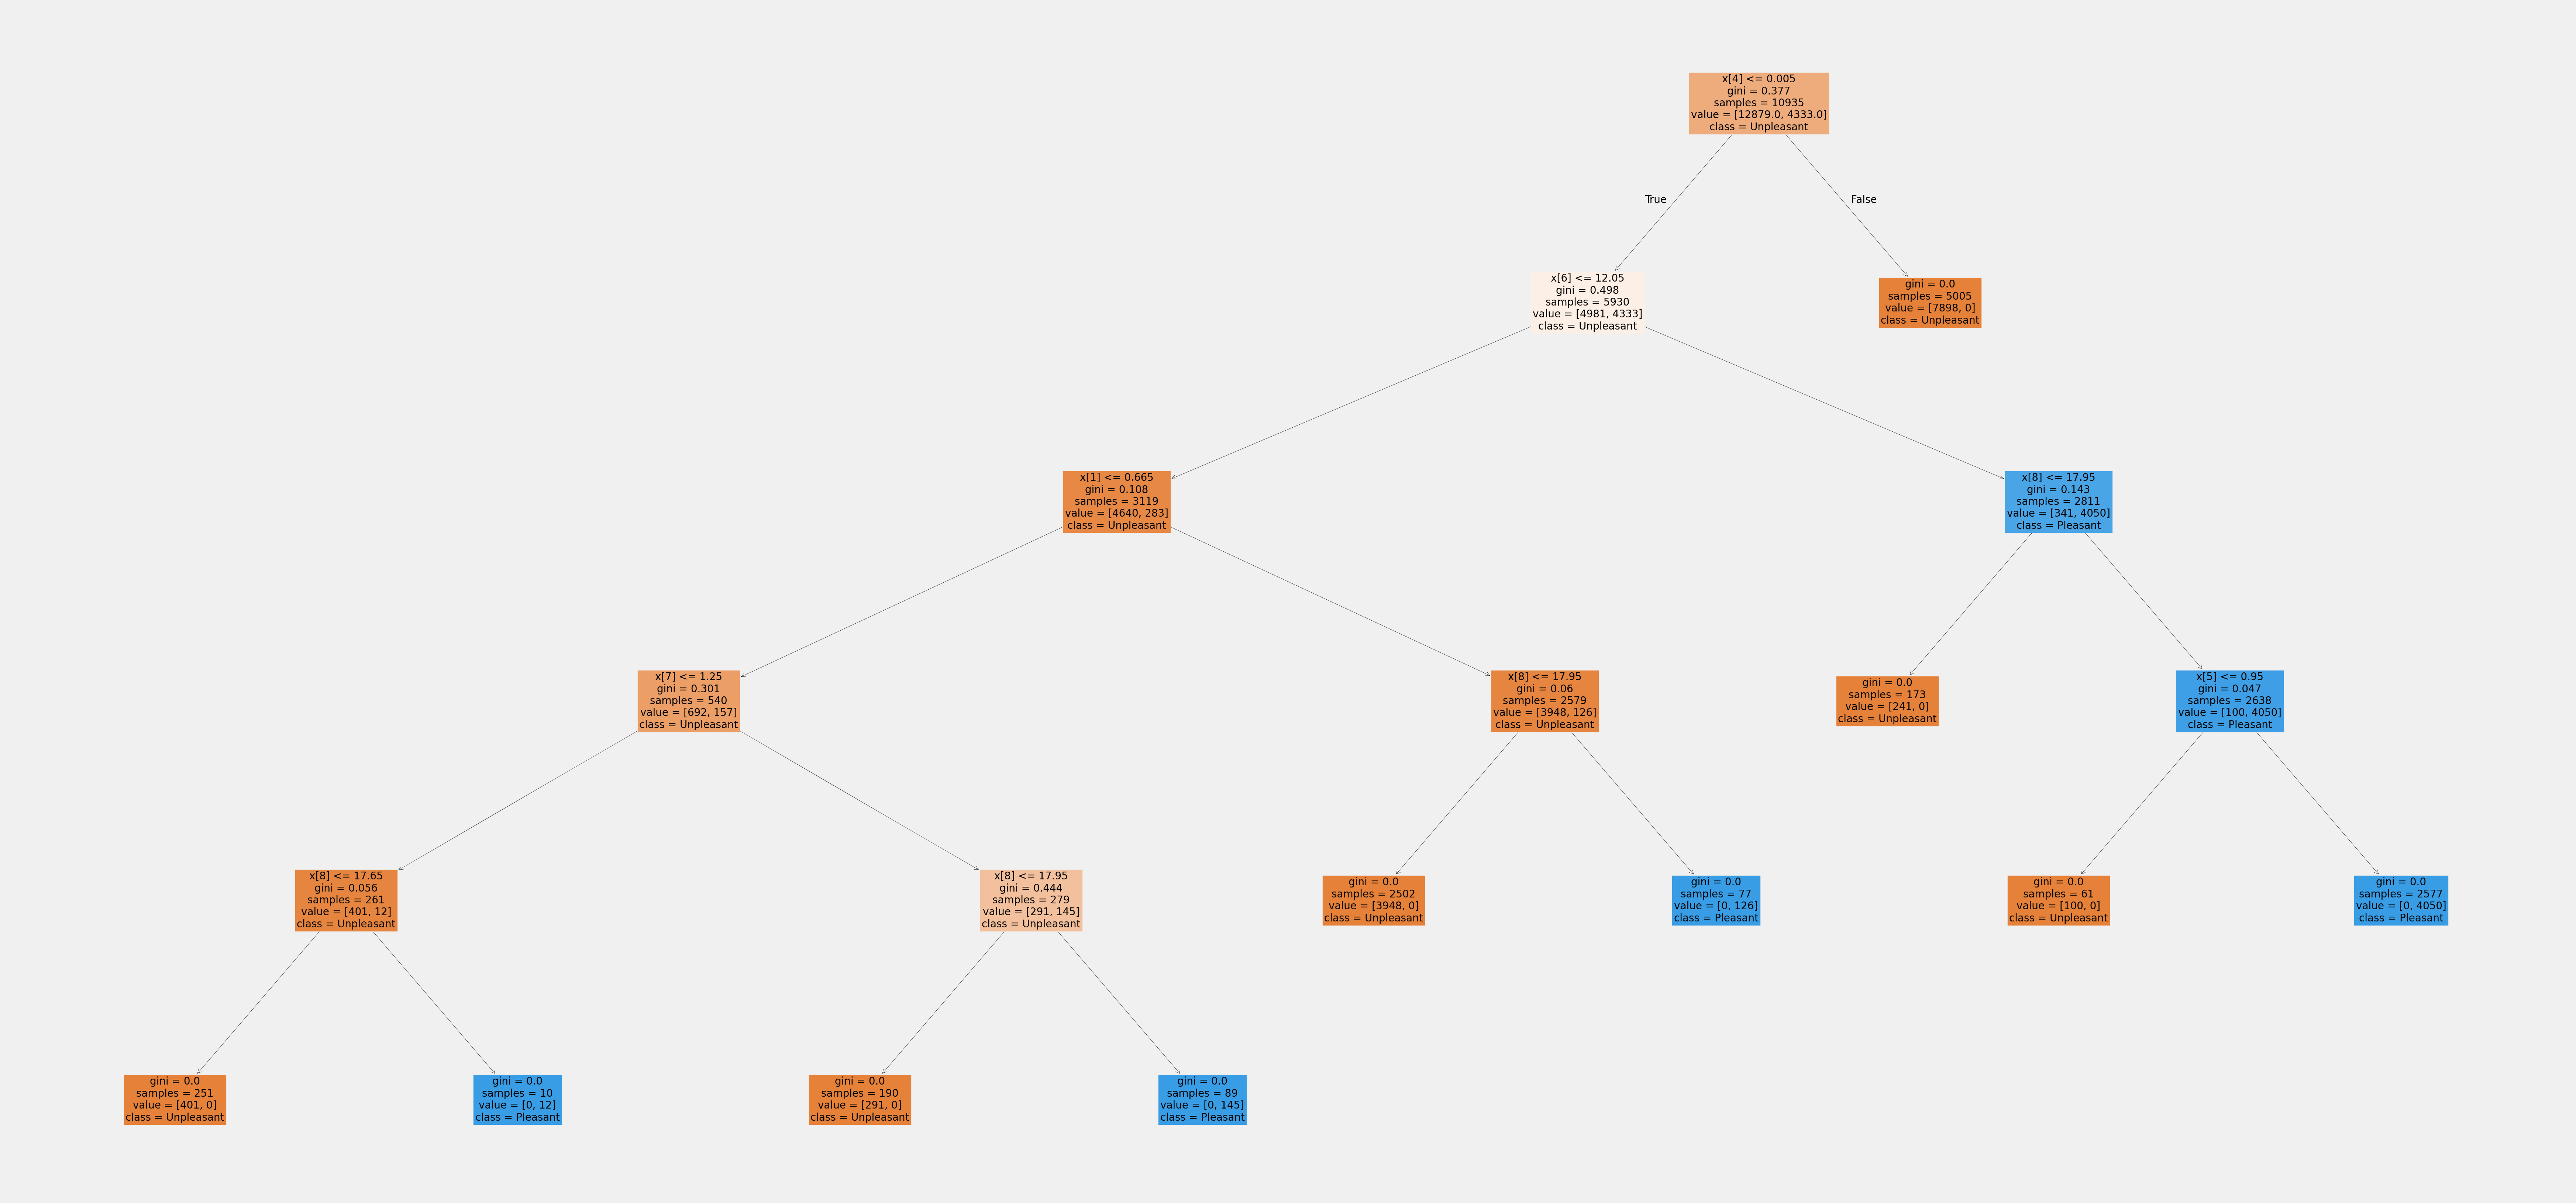

In [84]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf6.estimators_[3], fontsize = 20, class_names=['Unpleasant', 'Pleasant'], filled=True)
plt.show()

### List of feature importances

In [85]:
np.set_printoptions(threshold=np.inf)
newarray = clf6.feature_importances_
print(clf6.feature_importances_.shape)
newarray

(9,)


array([0.02177888, 0.01019621, 0.00673213, 0.08078211, 0.35983546,
       0.12818896, 0.08012119, 0.01740833, 0.29495674])

In [86]:
# list of observations
observations = list()
for c in weather_df.columns:
    if c.split('_', 1)[1] not in observations:
       observations.append(c.split('_', 1)[1])

observations

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [87]:
important = pd.Series(newarray, index = observations) #.sort_values(ascending = False)
important

cloud_cover         0.021779
humidity            0.010196
pressure            0.006732
global_radiation    0.080782
precipitation       0.359835
sunshine            0.128189
temp_mean           0.080121
temp_min            0.017408
temp_max            0.294957
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


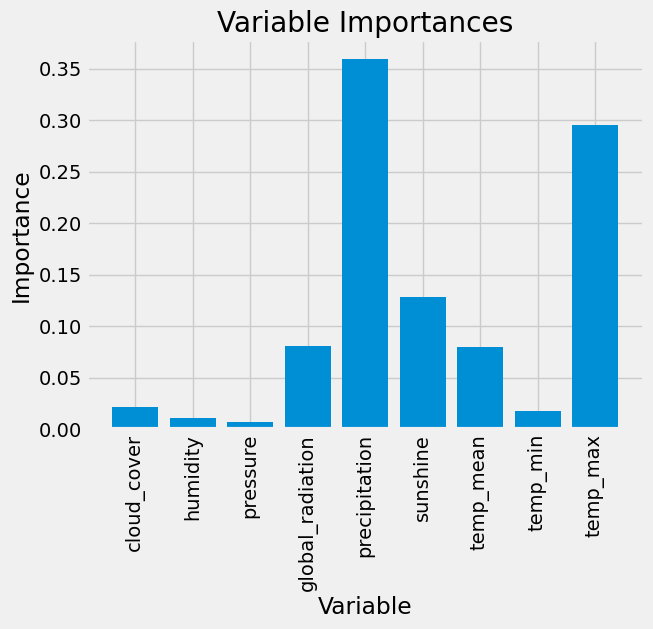

In [88]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(observations)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, observations, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')
plt.show()

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


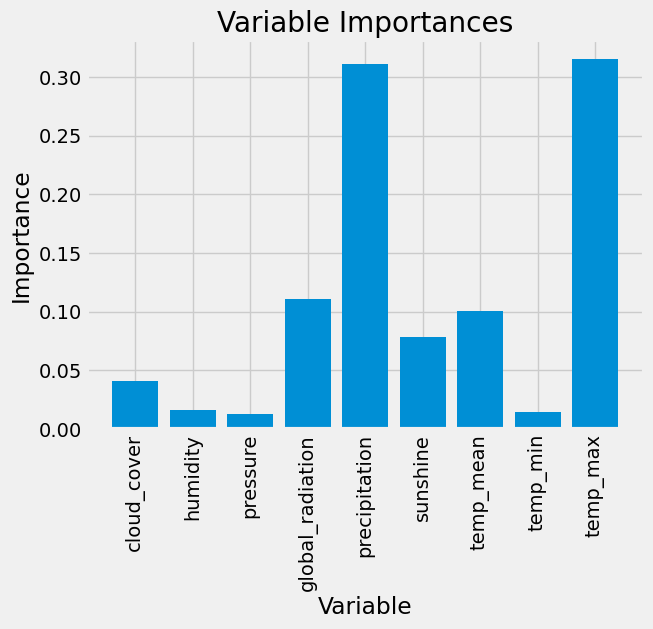

In [117]:
%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(observations)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, observations, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')
plt.show()